In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =  pd.read_csv('tweet_all2.csv',  sep=';;', on_bad_lines='skip',lineterminator='\r', engine ='python')
df.head(10)

,id,text,created_at,author_id,lang,in_reply_to_user_id
0,1000016383915253765,"@CleberEsteves09, bom dia. A Imigrantes, neste...",2018-05-25 14:10:59,138075168,pt,96735968
1,1000016491390099456,Oposição cabo-verdiana entrega projeto para re...,2018-05-25 14:11:25,1690412382,pt,None
2,1000016689931653123,"""Cheguei a São Paulo como refugiado. Tinha 16 ...",2018-05-25 14:12:12,2149024418,pt,None
3,1000016951853318145,"""Cheguei a São Paulo como refugiado. Tinha 16 ...",2018-05-25 14:13:15,26411144,pt,None
4,1000017172918358016,@Grettux_MG @SenhooraDepp @KaySsicaBaby No tt ...,2018-05-25 14:14:08,818123243924160513,pt,2493509342
5,1000017631733272577,Deu certo para caralho a “democracia” socialis...,2018-05-25 14:15:57,19994120,pt,None
6,1000017703409737728,"@leandroantoniop, bom dia. O trecho de Itanhaé...",2018-05-25 14:16:14,138075168,pt,2889544265
7,1000017730848911360,Bom.dia!\,None,None,None,None
8,"Rodovias Anchieta, Imigrantes, Rodoanel e Regi...",None,None,None,None,None
9,Acabou os combustíveis e a greve segue pelo qu...,None,None,None,None,None


In [4]:
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str)
    except:
        return pd.NaT  

#  parsing function
df['created_at'] = df['created_at'].apply(parse_date)

# Drop rows with missing dates
df = df.dropna(subset=['created_at'])

# Extract the 'date' and 'time' components
df['date'] = df['created_at'].dt.date
df['time'] = df['created_at'].dt.time

# updated DataFrame
df.to_csv('tweet_all2_updated.csv', index=False)

In [5]:
print(df.head(5))


                    id                                               text  \
0  1000016383915253765  @CleberEsteves09, bom dia. A Imigrantes, neste...   
1  1000016491390099456  Oposição cabo-verdiana entrega projeto para re...   
2  1000016689931653123  "Cheguei a São Paulo como refugiado. Tinha 16 ...   
3  1000016951853318145  "Cheguei a São Paulo como refugiado. Tinha 16 ...   
4  1000017172918358016  @Grettux_MG @SenhooraDepp @KaySsicaBaby No tt ...   

           created_at           author_id lang in_reply_to_user_id  \
0 2018-05-25 14:10:59           138075168   pt            96735968   
1 2018-05-25 14:11:25          1690412382   pt                None   
2 2018-05-25 14:12:12          2149024418   pt                None   
3 2018-05-25 14:13:15            26411144   pt                None   
4 2018-05-25 14:14:08  818123243924160513   pt          2493509342   

         date      time  
0  2018-05-25  14:10:59  
1  2018-05-25  14:11:25  
2  2018-05-25  14:12:12  
3  2018-05-2

In [6]:
# Convert to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date

# Filter rows for the years 2015 to 2019 (BECAUSE SOME WEIRD YEARS APPEARED - MAYBE BECAUSE OF THE CODE BEFORE :((( )
filtered_df = df[(df['created_at'] >= pd.Timestamp('2015-01-01')) & (df['created_at'] <= pd.Timestamp('2019-12-31'))]

# freq 2015 to 2019
year_frequency = filtered_df.groupby(filtered_df['created_at'].dt.year)['date'].count()

print(year_frequency)


created_at
2015    151526
2016    169622
2017    154881
2018    146266
2019    139898
Name: date, dtype: int64


In [10]:
# Filter rows for the years 2015 to 2019
filtered_df = df[(df['created_at'] >= pd.Timestamp('2015-01-01')) & (df['created_at'] <= pd.Timestamp('2019-12-31'))]

# Group by year and month and freq
year_monthly_frequency = filtered_df.groupby([filtered_df['created_at'].dt.year, filtered_df['created_at'].dt.month])['date'].count()

print(year_monthly_frequency)

# THERE IS NO JANUARY :/ SOMETHING IS WRONG

created_at  created_at
2015        2             10492
            3              9450
            4             12658
            5             14956
            6             14181
            7             12928
            8             15582
            9             15918
            10            15456
            11            15034
            12            14871
2016        1             14803
            2             13798
            3             14586
            4             14373
            5             13889
            6             14141
            7             14199
            8             13963
            9             14375
            10            14583
            11            13586
            12            13326
2017        1             13560
            2             13565
            3             13805
            4             12362
            5             14012
            6             13105
            7             12166
            8    

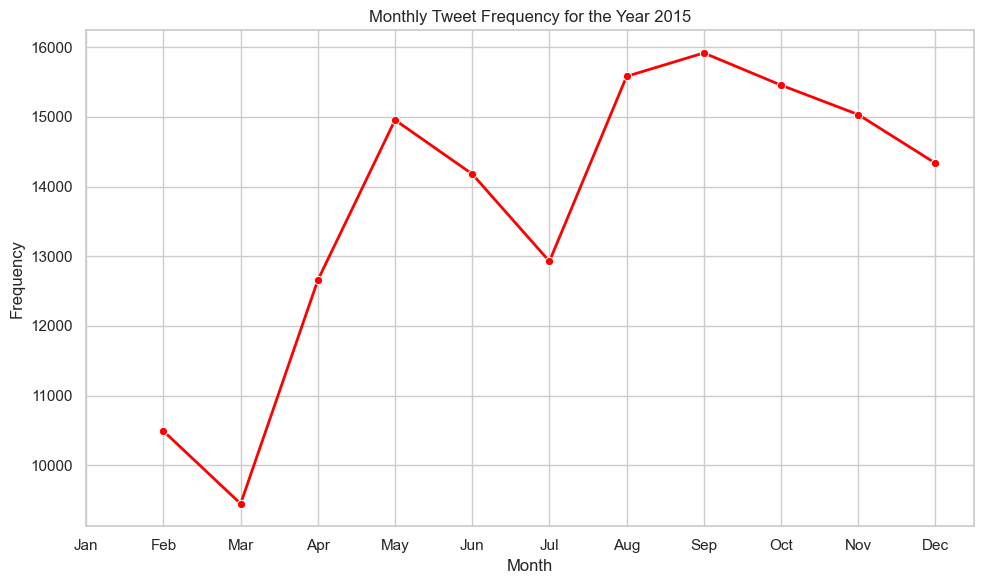

In [24]:
# Filter rows for the year 2015
filtered_df = df[(df['created_at'] >= pd.Timestamp('2015-01-01')) & (df['created_at'] <= pd.Timestamp('2015-12-31'))]

# Group by month and calculate the frequency
monthly_frequency = filtered_df.groupby(filtered_df['created_at'].dt.month)['date'].count()

# Create a dictionary to map month numbers to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set Seaborn style to "whitegrid" for a modern look
sns.set_theme(style="whitegrid")

# Plot line chart for the year 2015 using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_frequency.index, y=monthly_frequency.values, marker='o', color='red', linewidth=2)

plt.title('Monthly Tweet Frequency for the Year 2015')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13), month_names)
plt.tight_layout()
plt.show()

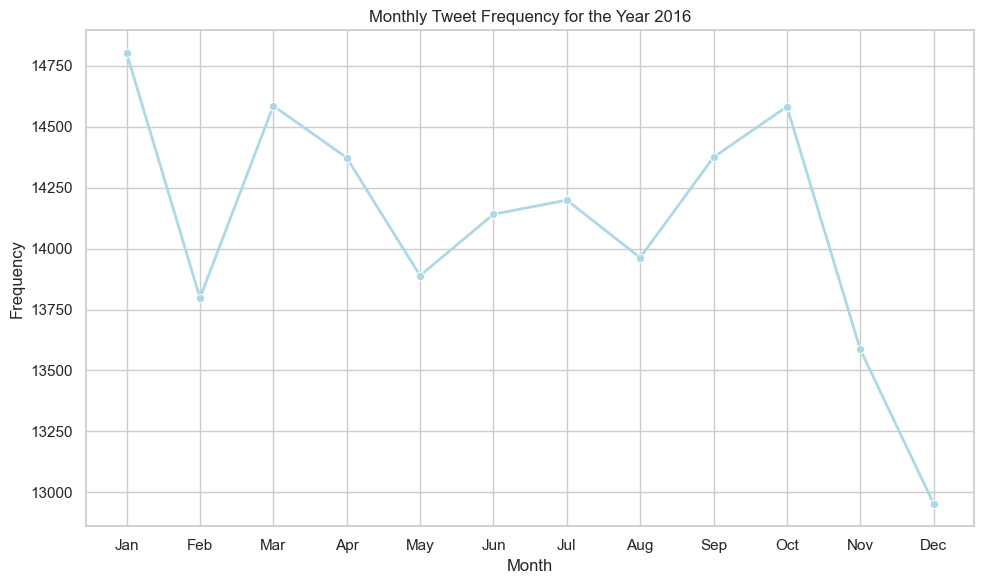

In [26]:
# Filter rows for the year 2016
filtered_df = df[(df['created_at'] >= pd.Timestamp('2016-01-01')) & (df['created_at'] <= pd.Timestamp('2016-12-31'))]

# Group by month and calculate the frequency
monthly_frequency = filtered_df.groupby(filtered_df['created_at'].dt.month)['date'].count()

# Create a dictionary to map month numbers to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set Seaborn style to "whitegrid" for a modern look
sns.set_theme(style="whitegrid")

# Plot line chart for the year 2015 using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_frequency.index, y=monthly_frequency.values, marker='o', color='lightblue', linewidth=2)

plt.title('Monthly Tweet Frequency for the Year 2016')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13), month_names)
plt.tight_layout()
plt.show()

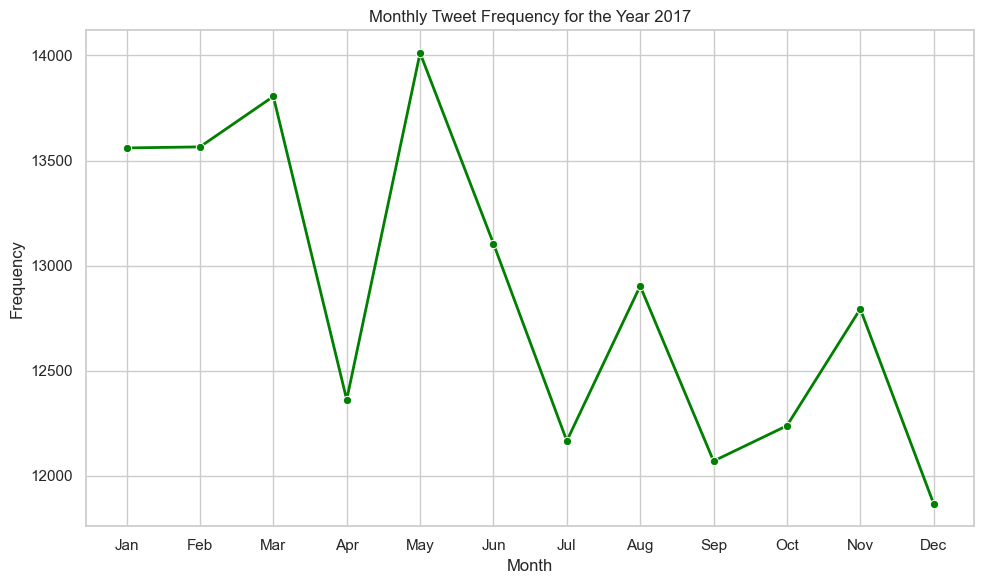

In [27]:
# Filter rows for the year 2015
filtered_df = df[(df['created_at'] >= pd.Timestamp('2017-01-01')) & (df['created_at'] <= pd.Timestamp('2017-12-31'))]

# Group by month and calculate the frequency
monthly_frequency = filtered_df.groupby(filtered_df['created_at'].dt.month)['date'].count()

# Create a dictionary to map month numbers to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set Seaborn style to "whitegrid" for a modern look
sns.set_theme(style="whitegrid")

# Plot line chart for the year 2015 using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_frequency.index, y=monthly_frequency.values, marker='o', color='green', linewidth=2)

plt.title('Monthly Tweet Frequency for the Year 2017')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13), month_names)
plt.tight_layout()
plt.show()

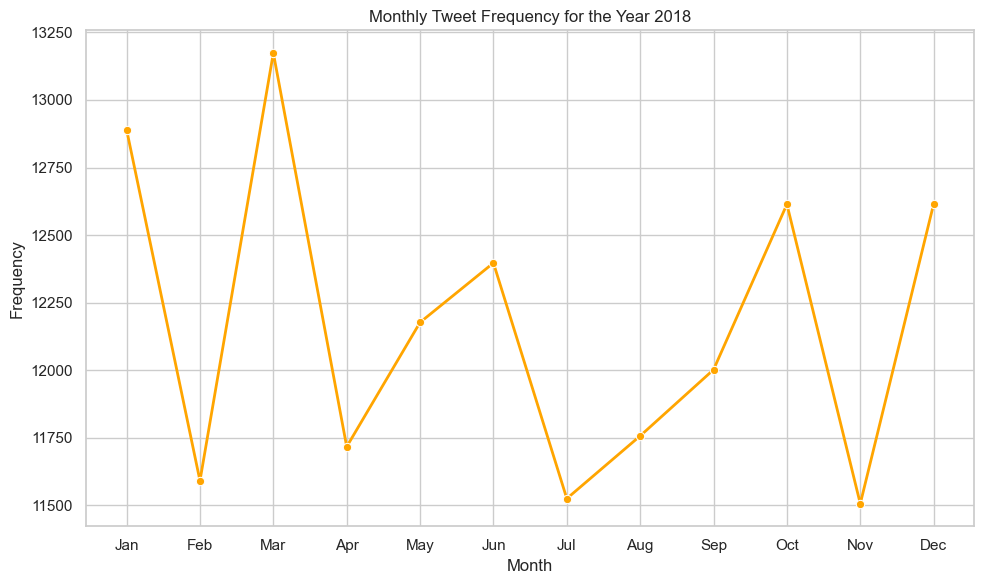

In [28]:
# Filter rows for the year 2018
filtered_df = df[(df['created_at'] >= pd.Timestamp('2018-01-01')) & (df['created_at'] <= pd.Timestamp('2018-12-31'))]

# Group by month and calculate the frequency
monthly_frequency = filtered_df.groupby(filtered_df['created_at'].dt.month)['date'].count()

# Create a dictionary to map month numbers to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set Seaborn style to "whitegrid" for a modern look
sns.set_theme(style="whitegrid")

# Plot line chart for the year 2015 using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_frequency.index, y=monthly_frequency.values, marker='o', color='orange', linewidth=2)

plt.title('Monthly Tweet Frequency for the Year 2018')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13), month_names)
plt.tight_layout()
plt.show()

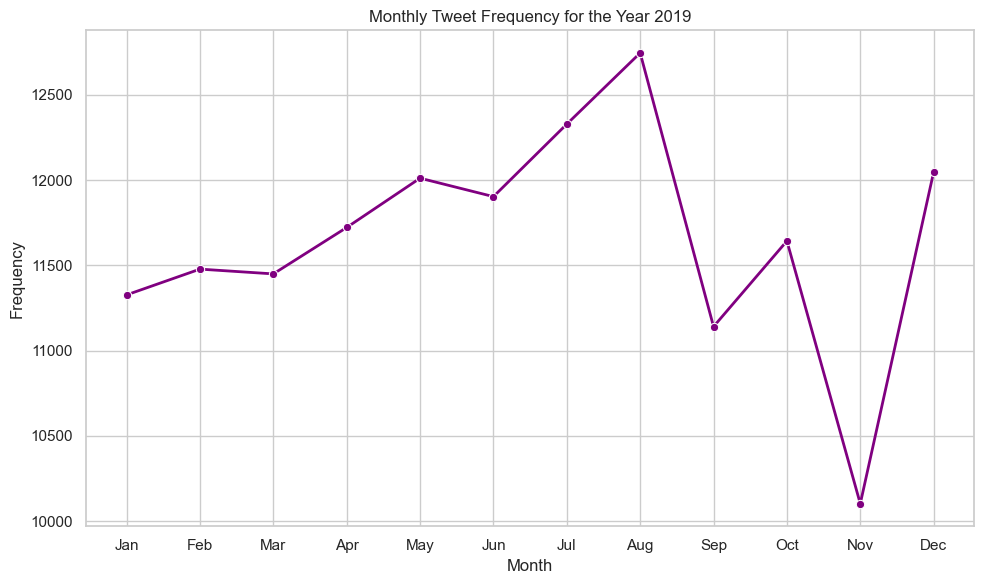

In [29]:
# Filter rows for the year 2015
filtered_df = df[(df['created_at'] >= pd.Timestamp('2019-01-01')) & (df['created_at'] <= pd.Timestamp('2019-12-31'))]

# Group by month and calculate the frequency
monthly_frequency = filtered_df.groupby(filtered_df['created_at'].dt.month)['date'].count()

# Create a dictionary to map month numbers to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set Seaborn style to "whitegrid" for a modern look
sns.set_theme(style="whitegrid")

# Plot line chart for the year 2015 using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_frequency.index, y=monthly_frequency.values, marker='o', color='purple', linewidth=2)

plt.title('Monthly Tweet Frequency for the Year 2019')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13), month_names)
plt.tight_layout()
plt.show()